# System Recommendation - MovieLens (Neural Network)

### Import Library

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
import tensorflow as tf
%matplotlib inline

### 1. Preprocessing

#### Import Data

In [6]:
data_df = pd.read_csv('../../data/movielens/u1.base', sep='\t', header=None, names=['User Id', 'Movie Id', 'Rating', 'Timestamp'])

In [11]:
data_df.head()

,User Id,Movie Id,Rating,Timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [12]:
data_df.shape

(80000, 4)

In [14]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   User Id    80000 non-null  int64
 1   Movie Id   80000 non-null  int64
 2   Rating     80000 non-null  int64
 3   Timestamp  80000 non-null  int64
dtypes: int64(4)
memory usage: 2.4 MB


##### Total Unique User

In [63]:
total_user = data_df['User Id'].max()

In [64]:
total_user

943

##### Total Unique Movie

In [61]:
total_movie = data_df['Movie Id'].max()

In [62]:
total_movie

1682

#### Split Data Into Training Set (80%) And Validation Set (20%)

In [76]:
train, val = model_selection.train_test_split(data_df, test_size=0.2, random_state=21)

In [36]:
train

,User Id,Movie Id,Rating,Timestamp
3002,55,597,2,878176134
45402,591,740,4,891039974
32556,463,121,3,877385797
11777,222,181,4,877563168
14138,267,203,5,878972241
...,...,...,...,...
42104,551,182,5,892776824
63856,786,82,4,882844096
8964,174,9,5,886439492
71480,866,889,2,891221006


In [9]:
train.shape

(64000, 4)

In [80]:
val

,User Id,Movie Id,Rating,Timestamp
238,5,181,5,875635757
77599,918,638,4,891987267
77838,919,1119,3,875373824
59804,740,328,3,879522814
71338,864,684,4,888887289
...,...,...,...,...
7542,137,121,5,881432881
37198,504,504,4,887909890
46405,601,834,1,876348381
44981,587,682,3,892871372


In [81]:
val.shape

(16000, 4)

#### Import Test Set

In [77]:
test = pd.read_csv('../../data/movielens/u1.test', sep='\t', header=None, names=['User Id', 'Movie Id', 'Rating', 'Timestamp'])

In [78]:
test.head()

,User Id,Movie Id,Rating,Timestamp
0,1,6,5,887431973
1,1,10,3,875693118
2,1,12,5,878542960
3,1,14,5,874965706
4,1,17,3,875073198


In [79]:
test.shape

(20000, 4)

### 2. Implement Neural Network Model

#### Create Embedding Layer For Movie

In [65]:
movie_input = tf.keras.layers.Input(shape=[1], name='Movie-Input')
movie_embedding = tf.keras.layers.Embedding(total_movie + 1, 5, name='Movie-Embedding')(movie_input)
movie_vec = tf.keras.layers.Flatten(name='Flatten-Movie')(movie_embedding)

#### Create Embedding Layer For User

In [66]:
user_input = tf.keras.layers.Input(shape=[1], name='User-Input')
user_embedding = tf.keras.layers.Embedding(total_user + 1, 5, name='User-Embedding')(user_input)
user_vec = tf.keras.layers.Flatten(name='Flatten-User')(user_embedding)

#### Concat Movie Vector Layer & User Vector Layer

In [53]:
conc = tf.keras.layers.Concatenate()([movie_vec, user_vec])

#### Create Fully Connected Layer

In [54]:
dense_1 = tf.keras.layers.Dense(128, activation='relu')(conc)
dense_2 = tf.keras.layers.Dense(64, activation='relu')(dense_1)
out = tf.keras.layers.Dense(1)(dense_2)

#### Compile Model

In [55]:
model = tf.keras.models.Model([user_input, movie_input], out)
model.compile('adam', 'mean_squared_error')

In [56]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Movie-Input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 User-Input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 Movie-Embedding (Embedding)    (None, 1, 5)         8415        ['Movie-Input[0][0]']            
                                                                                                  
 User-Embedding (Embedding)     (None, 1, 5)         4720        ['User-Input[0][0]']             
                                                                                            

#### Train Model

In [82]:
history = model.fit([train['User Id'], train['Movie Id']], train['Rating'], validation_data=([val['User Id'], val['Movie Id']], val['Rating']), epochs=25, verbose=1)

Epoch 1/25
2000/2000 [==============================] - 3s 1ms/step - loss: 0.5574 - val_loss: 1.0522
Epoch 2/25
2000/2000 [==============================] - 3s 1ms/step - loss: 0.5556 - val_loss: 1.0078
Epoch 3/25
2000/2000 [==============================] - 3s 1ms/step - loss: 0.5544 - val_loss: 1.0122
Epoch 4/25
2000/2000 [==============================] - 3s 1ms/step - loss: 0.5512 - val_loss: 1.0453
Epoch 5/25
2000/2000 [==============================] - 3s 1ms/step - loss: 0.5505 - val_loss: 1.0068
Epoch 6/25
2000/2000 [==============================] - 3s 1ms/step - loss: 0.5477 - val_loss: 1.0150
Epoch 7/25
2000/2000 [==============================] - 3s 1ms/step - loss: 0.5471 - val_loss: 1.0403
Epoch 8/25
2000/2000 [==============================] - 3s 1ms/step - loss: 0.5442 - val_loss: 1.0266
Epoch 9/25
2000/2000 [==============================] - 3s 1ms/step - loss: 0.5429 - val_loss: 1.0420
Epoch 10/25
2000/2000 [==============================] - 3s 1ms/step - loss: 0.541

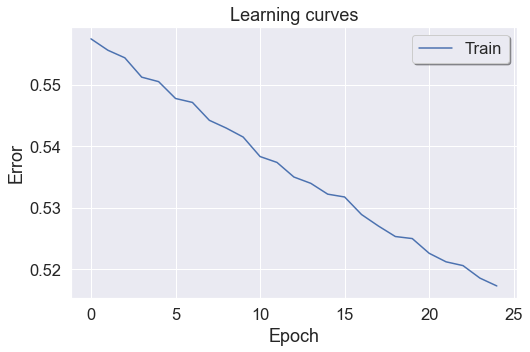

In [83]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set(font_scale = 1.5)

plt.plot(history.history['loss'], label="Train")
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('Error')
leg = plt.legend(loc='best', shadow=True, fancybox=True)

#### Evaluate Model

In [84]:
model.evaluate([test['User Id'], test['Movie Id']], test['Rating'])

625/625 [==============================] - 1s 858us/step - loss: 1.1363


1.1363468170166016